In [1]:
import pandas as pd
import numpy as np
def adapt_evaluation(participant_evaluation):
    pred_y = participant_evaluation["pred_y"]
    pred_y_median = np.nanmedian(pred_y, axis=1)
    pred_uncertainty = abs(participant_evaluation["euc_pred"])
    pred_uncertainty_median = np.nanmedian(pred_uncertainty, axis=1)
    df_pred_median = pd.DataFrame(
        np.concatenate(
            (pred_y_median, pred_uncertainty_median[..., np.newaxis]), axis=1),
        columns=["X", "Y", "Uncertainty"],
    )
    # With subTR
    subtr_values = np.concatenate((pred_y, pred_uncertainty[..., np.newaxis]),
                                  axis=2)
    index = pd.MultiIndex.from_product(
        [range(subtr_values.shape[0]),
         range(subtr_values.shape[1])],
        names=["TR", "subTR"])
    df_pred_subtr = pd.DataFrame(subtr_values.reshape(-1,
                                                      subtr_values.shape[-1]),
                                 index=index,
                                 columns=["X", "Y", "pred_error"])

    return df_pred_median, df_pred_subtr

In [2]:

import matplotlib.pyplot as plt
test = np.load("/Users/sinakling/disks/meso_shared/deepmreye/derivatives/deepmreye_calib/pred/evaluation_dict_calib.npy", allow_pickle=True).item()

test_sub_01 = test["/scratch/mszinte/data/deepmreye/derivatives/deepmreye_calib/pp_data/sub-01_DeepMReyeCalib_label.npz"]
test_sub_02 = test["/scratch/mszinte/data/deepmreye/derivatives/deepmreye_calib/pp_data/sub-02_DeepMReyeCalib_label.npz"]
test_sub_03 = test["/scratch/mszinte/data/deepmreye/derivatives/deepmreye_calib/pp_data/sub-03_DeepMReyeCalib_label.npz"]
df_pred_median_1, df_pred_subtr_1 = adapt_evaluation(test_sub_01)
df_pred_median_2, df_pred_subtr_2 = adapt_evaluation(test_sub_02)
df_pred_median_3, df_pred_subtr_3 = adapt_evaluation(test_sub_03)
print(len(df_pred_subtr_1))
print(len(df_pred_subtr_2))
print(len(df_pred_subtr_3))

4620
4620
4620


In [70]:
import matplotlib.pyplot as plt
test_pt = np.load("/Users/sinakling/disks/meso_shared/deepmreye/derivatives/deepmreye_calib/pred/evaluation_dict_calib_pretrained.npy", allow_pickle=True).item()
print(test_pt.keys())

test_pt_sub_01 = test_pt["/scratch/mszinte/data/deepmreye/derivatives/deepmreye_calib/pp_data_pretrained/sub-01_DeepMReyeCalib_no_label.npz"]
test_pt_sub_02 = test_pt["/scratch/mszinte/data/deepmreye/derivatives/deepmreye_calib/pp_data_pretrained/sub-02_DeepMReyeCalib_no_label.npz"]
test_pt_sub_03 = test_pt["/scratch/mszinte/data/deepmreye/derivatives/deepmreye_calib/pp_data_pretrained/sub-03_DeepMReyeCalib_no_label.npz"]
df_pred_pt_median_1, df_pred_pt_subtr_1 = adapt_evaluation(test_pt_sub_01)
df_pred_pt_median_2, df_pred_pt_subtr_2 = adapt_evaluation(test_pt_sub_02)
df_pred_pt_median_3, df_pred_pt_subtr_3 = adapt_evaluation(test_pt_sub_03)
print(len(df_pred_pt_subtr_1))
print(len(df_pred_pt_subtr_2))
print(len(df_pred_pt_subtr_3))

dict_keys(['/scratch/mszinte/data/deepmreye/derivatives/deepmreye_calib/pp_data_pretrained/sub-10_DeepMReyeCalib_no_label.npz', '/scratch/mszinte/data/deepmreye/derivatives/deepmreye_calib/pp_data_pretrained/sub-13_DeepMReyeCalib_no_label.npz', '/scratch/mszinte/data/deepmreye/derivatives/deepmreye_calib/pp_data_pretrained/sub-09_DeepMReyeCalib_no_label.npz', '/scratch/mszinte/data/deepmreye/derivatives/deepmreye_calib/pp_data_pretrained/sub-15_DeepMReyeCalib_no_label.npz', '/scratch/mszinte/data/deepmreye/derivatives/deepmreye_calib/pp_data_pretrained/sub-04_DeepMReyeCalib_no_label.npz', '/scratch/mszinte/data/deepmreye/derivatives/deepmreye_calib/pp_data_pretrained/sub-03_DeepMReyeCalib_no_label.npz', '/scratch/mszinte/data/deepmreye/derivatives/deepmreye_calib/pp_data_pretrained/sub-06_DeepMReyeCalib_no_label.npz', '/scratch/mszinte/data/deepmreye/derivatives/deepmreye_calib/pp_data_pretrained/sub-02_DeepMReyeCalib_no_label.npz', '/scratch/mszinte/data/deepmreye/derivatives/deepmrey

In [3]:
sub_01_run_01_X = np.array(df_pred_subtr_1['X'][:1540])
sub_01_run_01_Y = np.array(df_pred_subtr_1['Y'][:1540])

sub_02_run_01_X = np.array(df_pred_subtr_2['X'][:1540])
sub_02_run_01_Y = np.array(df_pred_subtr_2['Y'][:1540])

sub_03_run_01_X = np.array(df_pred_subtr_3['X'][:1540])
sub_03_run_01_Y = np.array(df_pred_subtr_3['Y'][:1540])

In [83]:
sub_03_run_01_X_pt = np.array(df_pred_pt_subtr_3['X'][:1540])
sub_03_run_01_Y_pt = np.array(df_pred_pt_subtr_3['Y'][:1540])

sub_02_run_01_X_pt = np.array(df_pred_pt_subtr_2['X'][:1540])
sub_02_run_01_Y_pt = np.array(df_pred_pt_subtr_2['Y'][:1540])

In [21]:
eye_data = pd.read_csv(f"/Users/sinakling/disks/meso_shared/deepmreye/derivatives/pp_data/sub-03/eyetracking/sub-03_task-DeepMReyeCalib_run_01_eyedata.tsv.gz", compression='gzip', delimiter='\t')
eye_data = eye_data[['x', 'y']].to_numpy()

In [74]:
pt_x_intpl = np.load(f"/Users/sinakling/projects/DeepMReye/calib_data/calib_deepmreye_X_sub-03_run_01.npy")
pt_y_intpl = np.load(f"/Users/sinakling/projects/DeepMReye/calib_data/calib_deepmreye_Y_sub-03_run_01.npy")

print(pt_x_intpl.shape)

(184650,)


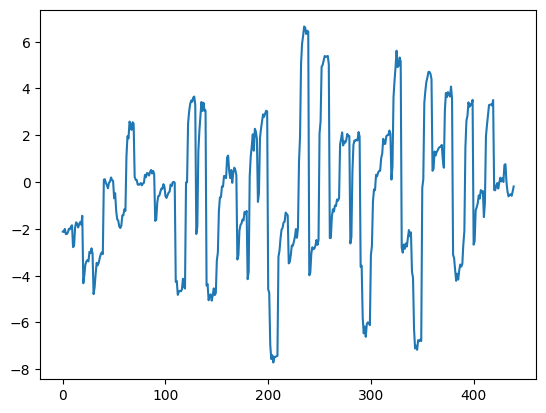

In [65]:
plt.plot(sub_03_run_01_X[1100:])

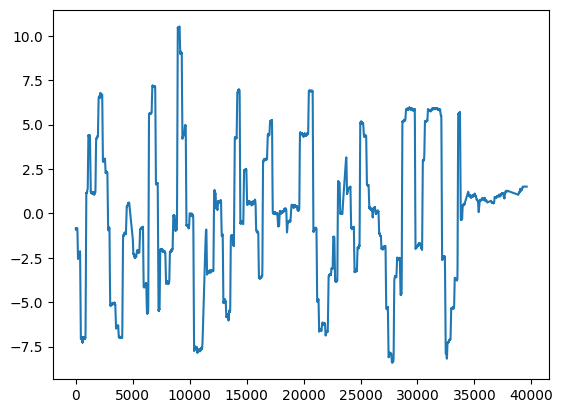

In [66]:
plt.plot(eye_data[145500:,0])

In [76]:
# Time vectors for the original signals
sub_03_run_01_X_intp = np.interp(
            np.linspace(0, 1, len(eye_data[:184550,:])),
            np.linspace(0, 1, len(sub_03_run_01_X)),
            sub_03_run_01_X
        )

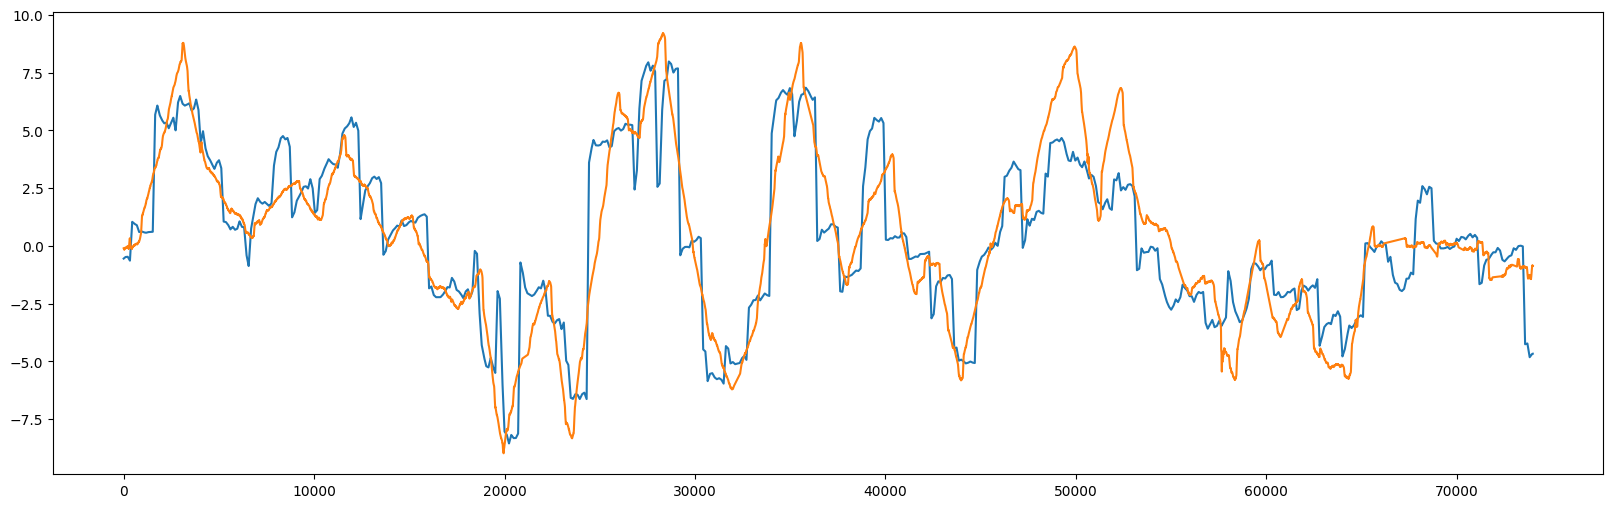

In [79]:
plt.figure(figsize=(20, 6))
plt.plot(sub_03_run_01_X_intp[71500:145500])
plt.plot(eye_data[71500:145500,0])

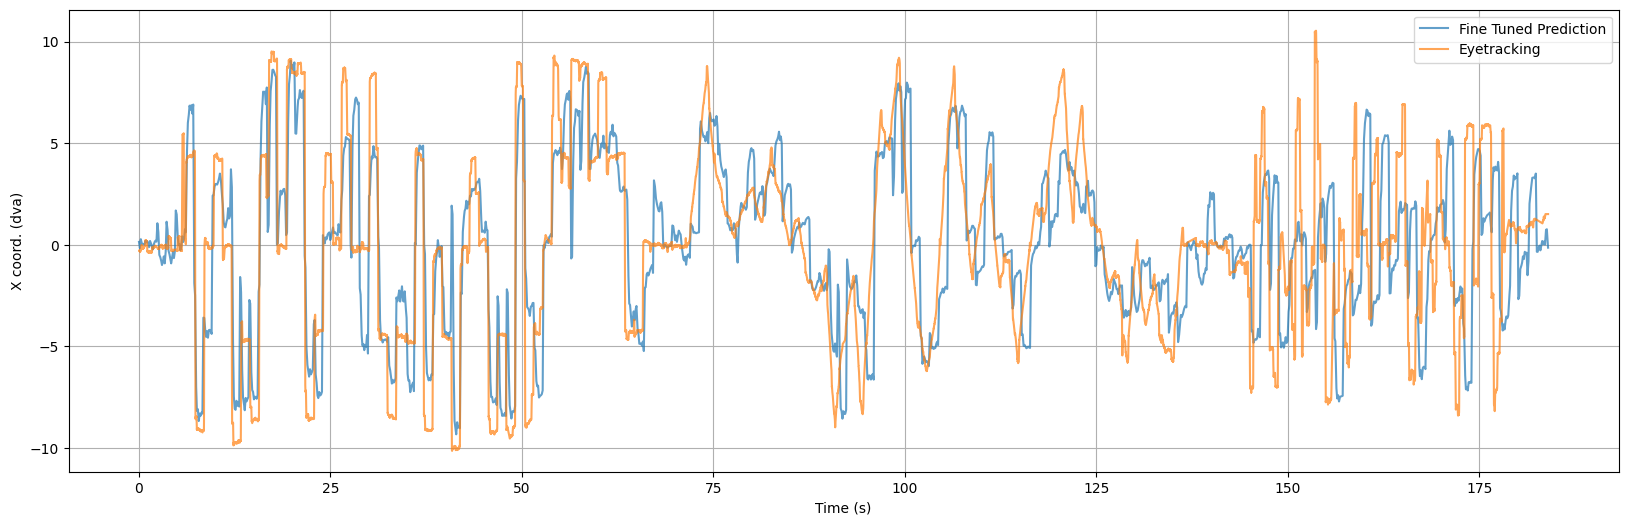

In [52]:
from scipy.interpolate import interp1d

# Time vectors for the original signals
time_prediction = np.linspace(0, 184.8, 1540)  # 1540 samples over 184.8 seconds
time_second = np.linspace(0, 184, len(eye_data))  # 185005 samples over 184 seconds

# Resample the prediction signal to 1000 Hz (match second signal)
interpolator_X = interp1d(time_prediction, sub_03_run_01_X, kind='linear', fill_value="extrapolate")
prediction_resampled_X = interpolator_X(time_second)

interpolator_Y = interp1d(time_prediction, sub_03_run_01_Y, kind='linear', fill_value="extrapolate")
prediction_resampled_Y = interpolator_Y(time_second)

#interpolator_pt = interp1d(time_prediction, sub_03_run_01_X_pt, kind='linear', fill_value="extrapolate")
#prediction_resampled_pt = interpolator_pt(time_second)

# Plot both signals
plt.figure(figsize=(20, 6))
plt.plot(time_second, prediction_resampled_X, label="Fine Tuned Prediction", alpha=0.7)
plt.plot(time_second, eye_data[:,0], label="Eyetracking", alpha=0.7)
#plt.plot(time_second, prediction_resampled_pt, label = 'Pretrained Prediction')
plt.xlabel("Time (s)")
plt.ylabel("X coord. (dva)")
plt.legend()
plt.grid(True)
plt.show()


In [26]:
print(len(eye_data))

185089


In [40]:
subject_prediction_X_run = prediction_resampled_X[145500:]
subject_prediction_Y_run = prediction_resampled_Y[145500:]
eye_data_fv = eye_data[145500:181000,:]

print(subject_prediction_X_run.shape)

(35500,)


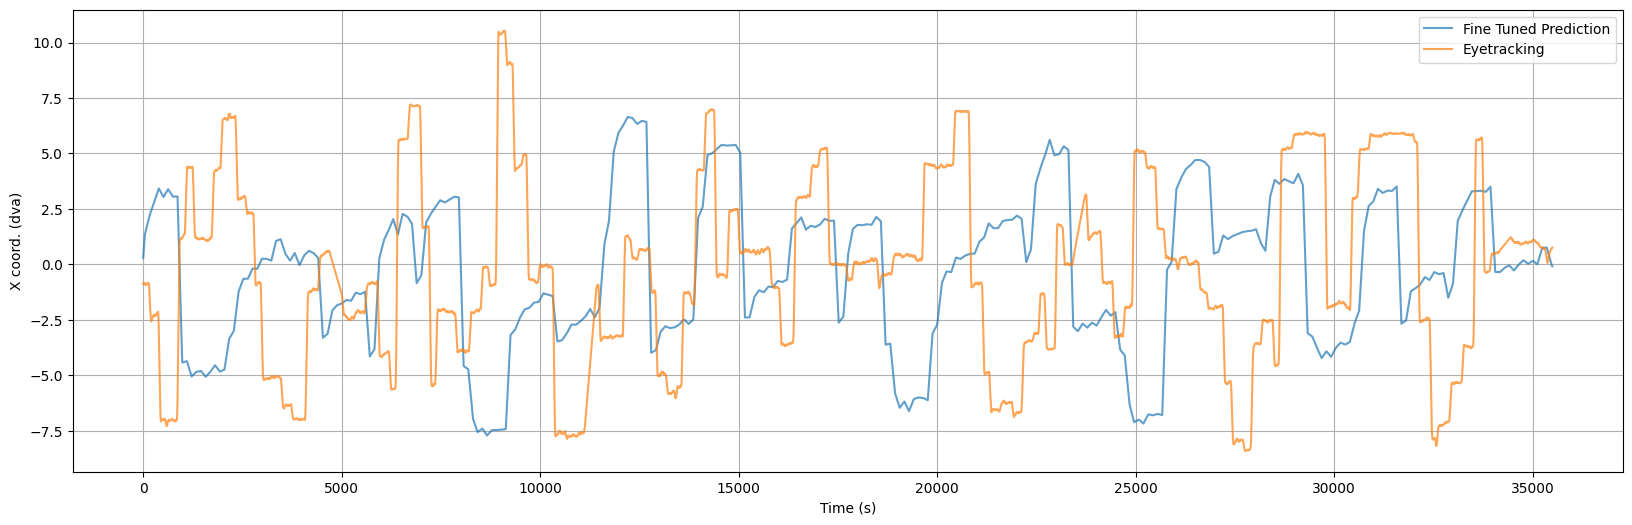

In [41]:
# Plot both signals
plt.figure(figsize=(20, 6))
plt.plot(subject_prediction_X_run, label="Fine Tuned Prediction", alpha=0.7)
plt.plot(eye_data_fv[:,0], label="Eyetracking", alpha=0.7)
#plt.plot(time_second, prediction_resampled_pt, label = 'Pretrained Prediction')
plt.xlabel("Time (s)")
plt.ylabel("X coord. (dva)")
plt.legend()
plt.grid(True)
plt.show()

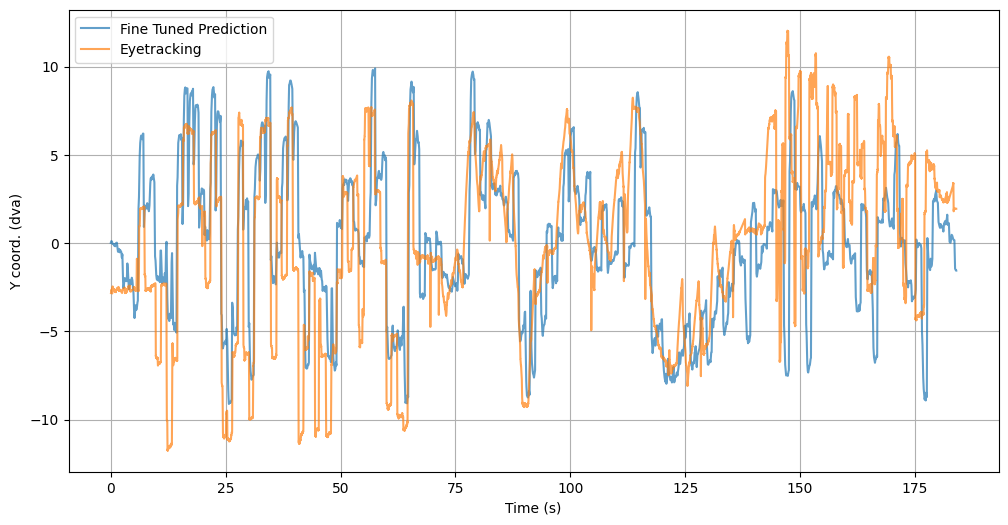

In [76]:
from scipy.interpolate import interp1d

# Time vectors for the original signals
time_prediction = np.linspace(0, 184.8, 1540)  # 1540 samples over 184.8 seconds
time_second = np.linspace(0, 184, len(eye_data))  # 185005 samples over 184 seconds

# Resample the prediction signal to 1000 Hz (match second signal)
interpolator = interp1d(time_prediction, sub_03_run_01_Y, kind='linear', fill_value="extrapolate")
prediction_resampled = interpolator(time_second)

# Plot both signals
plt.figure(figsize=(12, 6))
plt.plot(time_second, prediction_resampled, label="Fine Tuned Prediction", alpha=0.7)
plt.plot(time_second, eye_data[:,1], label="Eyetracking", alpha=0.7)
plt.xlabel("Time (s)")
plt.ylabel("Y coord. (dva)")
plt.legend()
plt.grid(True)
plt.show()
